In [1]:
# import pandas, matplotlib, seaborn, numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for plots
sns.set_style("whitegrid")

# Enable plots to show inline in Jupyter Notebook
%matplotlib inline

/Users/michealrawlings/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset into a pandas dataframe
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

Exploration of the Dataset

In [3]:
#Preview of the first few rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Dataframe shape
airbnb_df.shape

(48895, 16)

In [5]:
# Dataframe column names and types
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Basic Stats for numeric columns
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Check for missing values
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Investigate missing values
missing = airbnb_df.isnull().sum()

# Make a percentage of missing values
missing_percent = (missing / len(airbnb_df)) * 100

# Dataframe for missing values
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})

# Filter dataframe for missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

# Sort columns for highest missing values
missing_df.sort_values(by='Missing %', ascending=False)

,Missing Count,Missing %
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723


Handle missing values of the 4 columns

In [9]:
# Fill missing reviews with placeholders
airbnb_df['last_review'] = airbnb_df['last_review'].fillna('No reviews')

In [10]:
# Fill missing reviews per month with placeholders
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [11]:
# Replace missing host names with 'Unknown'
airbnb_df['host_name'] = airbnb_df['host_name'].fillna('Unkown')

In [12]:
# Drop rows with missing name since information is important
airbnb_df = airbnb_df.dropna(subset=['name'])

In [13]:
# Verify there are no more missing values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Explore column datatypes, set id to be the index

In [14]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   host_name                       48879 non-null  object 
 4   neighbourhood_group             48879 non-null  object 
 5   neighbourhood                   48879 non-null  object 
 6   latitude                        48879 non-null  float64
 7   longitude                       48879 non-null  float64
 8   room_type                       48879 non-null  object 
 9   price                           48879 non-null  int64  
 10  minimum_nights                  48879 non-null  int64  
 11  number_of_reviews               48879 non-null  int64  
 12  last_review                     

In [15]:
airbnb_df.set_index('id', inplace=True)

In [16]:
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No reviews,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Convert Column Data Types


In [17]:
# Change id and host id column to string 
# Identifiers and math will not be performed on them
airbnb_df.index = airbnb_df.index.astype(str)
airbnb_df['host_id'] = airbnb_df['host_id'].astype(str)

In [18]:
# Change the host_name to string
airbnb_df['host_name'] = airbnb_df['host_name'].astype(str)

In [19]:
# Change neighbourhood_group, neighbourhood and room type
# to category datatype
# Saves memory and improves group operations
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].astype('category')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype('category')
airbnb_df['room_type'] = airbnb_df['room_type'].astype('category')

In [20]:
# Lastly, change last_review to datetime
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

In [21]:
# Check all column datatypes
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48879 non-null  object        
 1   host_id                         48879 non-null  object        
 2   host_name                       48879 non-null  object        
 3   neighbourhood_group             48879 non-null  category      
 4   neighbourhood                   48879 non-null  category      
 5   latitude                        48879 non-null  float64       
 6   longitude                       48879 non-null  float64       
 7   room_type                       48879 non-null  category      
 8   price                           48879 non-null  int64         
 9   minimum_nights                  48879 non-null  int64         
 10  number_of_reviews               48879 non-null  int64         
 11  l

In [22]:
# Check for duplicate rows
airbnb_df.duplicated().sum()

0

In [23]:
# Check for duplicate ids
airbnb_df.index.duplicated().sum()

0

Do a 'Sanity Check' to make sure nothing weird slips by before analysis

In [24]:
# Do an in-depth describe 
airbnb_df.describe(include='all')

/var/folders/20/42s_047j5kv430pdth61krl40000gn/T/ipykernel_32560/798117228.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  airbnb_df.describe(include='all')


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48879,48879,48879,48879,48879,48879.000000,48879.000000,48879,48879.000000,48879.000000,48879.000000,38837,48879.000000,48879.000000,48879.000000
unique,47905,37443,11451,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,Hillside Hotel,219517861,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN
freq,18,327,417,21652,3918,NaN,NaN,25402,NaN,NaN,NaN,1413,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,40.728945,-73.952168,NaN,152.722355,7.011027,23.281205,NaN,1.091248,7.145891,112.788989
std,NaN,NaN,NaN,NaN,NaN,0.054529,0.046160,NaN,240.186804,20.016000,44.556149,NaN,1.597433,32.957738,131.613322
min,NaN,NaN,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,40.690090,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000


In [25]:
# Check unique values of neighbourhood group
print(airbnb_df['neighbourhood_group'].unique())
# Make sure values are normalized
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].str.strip()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


In [26]:
# Check unique values for neighbourhood
print(airbnb_df['neighbourhood'].unique())
# Normalize all values
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].str.strip()

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']


In [27]:
# Check unique values for room_type
print(airbnb_df['room_type'].unique())
# Normalize all values
airbnb_df['room_type'] = airbnb_df['room_type'].str.strip()

['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']


In [28]:
# Check unique values for price
print(airbnb_df['price'].unique())
# Check for non-numeric values
airbnb_df['price'].apply(type).value_counts()
# Remove/convert non-numeric or missing values
#airbnb_df['price'] = pd.to_numeric(airbnb_df['price'], errors='coerce')
#airbnb_df = airbnb_df[airbnb_df['price'].notna()]

[  149   225   150    89    80   200    60    79   135    85   120   140
   215    99   190   299   130   110    44   180    50    52    55    70
    35    40    68   115   151   228   144    69    49   375   250   275
   230    51    65   105    95   145   285    94   800   131    98   100
   125   175   500   101   220    59   350   199   325   235   170   400
    75    90   185    77    76   160   195   156   219   475   165   196
    83   123   265   249   121    45    71    64   159   189   239   305
   155    92    36    37   205    39   390   129   212   124   122   109
   575   229   169   113   179   349   139   650    67   599   211   290
    87   395   260    97   132   141   495   259    96   295   451   300
    42   255    72    88   450   198    46    33   106    91  2000   429
   107    43   248    41   157   172   146   116   288   270   241   399
   438   279   137   280   226   154   700   246   119   850    81    54
   760    48    58   153    73   485   310   167   

<class 'int'>    48879
Name: price, dtype: int64

In [29]:
# Filter out outliers

# filter out outlier minimum nights
airbnb_df_clean = airbnb_df[airbnb_df['minimum_nights'] <= 365]
# filter out outlier prices
airbnb_df_clean = airbnb_df_clean[airbnb_df_clean['price'] <= 1000]
# filter out inactive listings
airbnb_df_clean = airbnb_df_clean[airbnb_df_clean['availability_365'] >0]

Now that we have a nice, clean dataset,
Lets begin exploring and visualizing the data

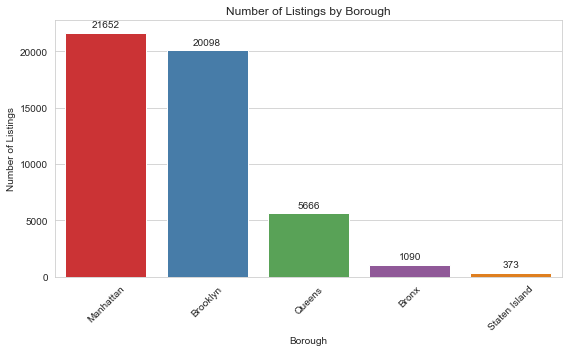

In [30]:
# Visualize the number of listings per bourough (neighbourhood_groups)
plt.figure(figsize=(8,5))
# Plot bars by neighbourhood_group, order the bars by value counts, use palette for better contrast
ax = sns.countplot(data=airbnb_df, x='neighbourhood_group',
              order=airbnb_df['neighbourhood_group'].value_counts().index, 
                  palette='Set1') #hue='neighbourhood_group'
plt.title('Number of Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.tight_layout()
plt.show()

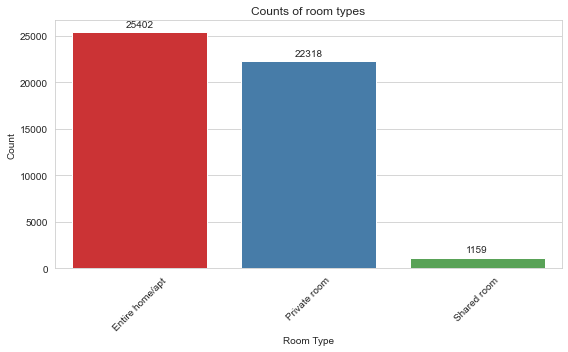

In [31]:
# Plot the number of listings by room_type
plt.figure(figsize=(8,5))
ax = sns.countplot(data=airbnb_df, x='room_type', 
              order=airbnb_df['room_type'].value_counts().index,
                  palette='Set1')
plt.title('Counts of room types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

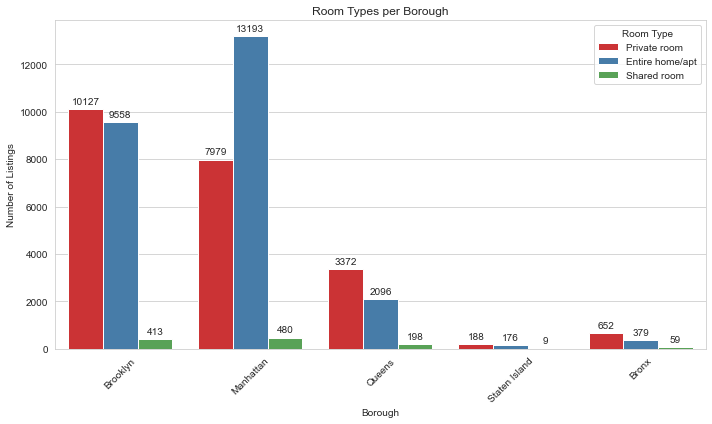

In [32]:
# Visualize the room types per borough
plt.figure(figsize=(10,6))
ax = sns.countplot(
data=airbnb_df,
x='neighbourhood_group',
hue='room_type',
palette='Set1')
plt.title('Room Types per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

Begin visualization of Prices and how they compare with room types, different boroughs, etc.

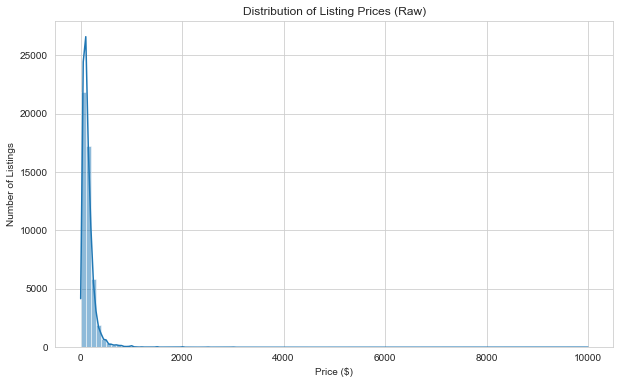

In [33]:
# Visualize the raw price distribution
plt.figure(figsize=(10,6))
sns.histplot(airbnb_df['price'], bins=100, kde=True)
plt.title('Distribution of Listing Prices (Raw)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

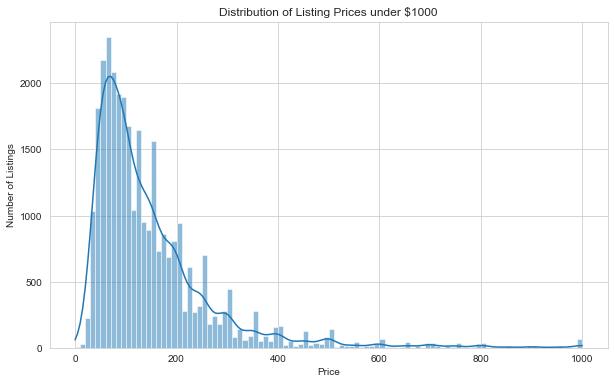

In [34]:
# Replot the price distribution with the clean df
plt.figure(figsize=(10,6))
sns.histplot(airbnb_df_clean['price'], bins=100, kde=True)
plt.title('Distribution of Listing Prices under $1000')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()

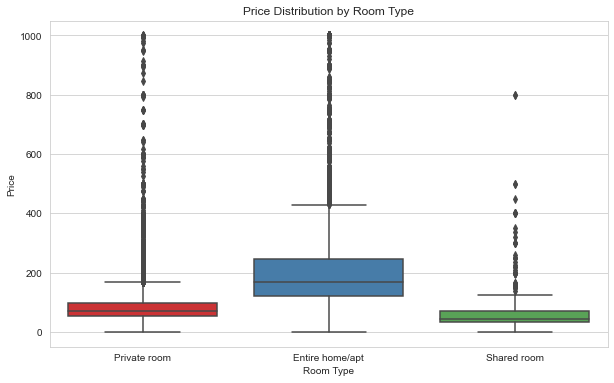

In [35]:
# Visualize the price by room type
plt.figure(figsize=(10,6))
sns.boxplot(data=airbnb_df_clean,
           x='room_type',
           y='price',
           palette='Set1')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
#plt.yscale('log') # Can help with the skew
plt.show()

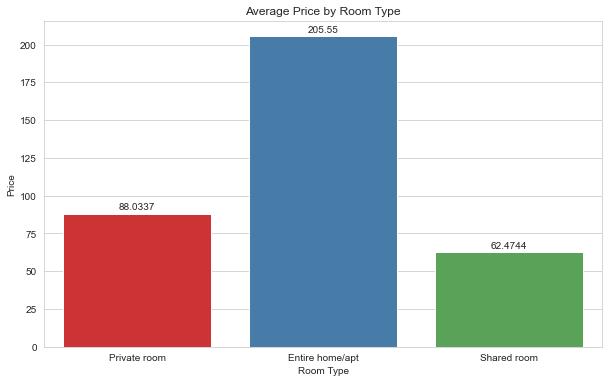

In [36]:
# Visualize the average price for each room type
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
           x='room_type',
           y='price',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

for container in ax.containers:
    ax.bar_label(container, padding=2)
plt.show()

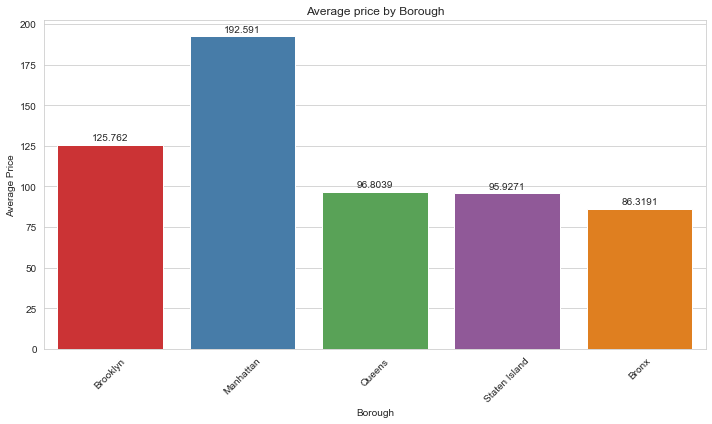

In [37]:
# Visualize the average price between buroughs
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
                x='neighbourhood_group',
                y='price',
                estimator=np.mean,
                ci=None,
                palette='Set1')
plt.title('Average price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, padding=2)

plt.tight_layout()
plt.show()

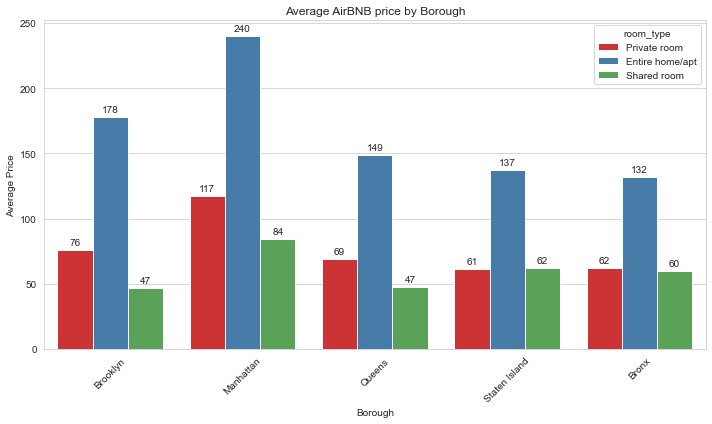

In [38]:
# Visualize the average price for each room type in each borough
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
           x='neighbourhood_group',
           y='price',
           hue='room_type',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average AirBNB price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Now lets explore the 'minimum_nights' column for each listing

In [39]:
# Print the descriptive statistics for the 'minimum_nights' column
airbnb_df_clean['minimum_nights'].describe()

count    31173.000000
mean         7.976422
std         17.981484
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        365.000000
Name: minimum_nights, dtype: float64

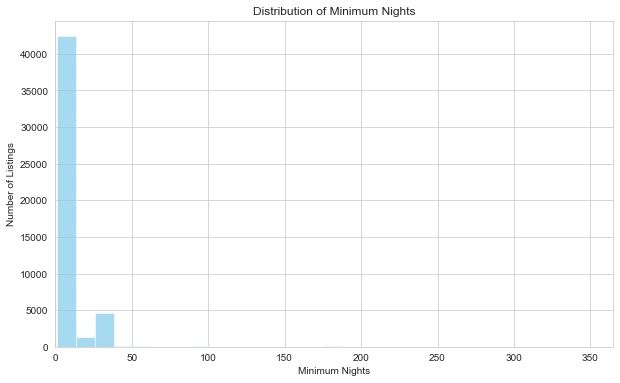

In [40]:
# The average minimum nights is 7 
# Most people book an airbnb for a day or 2 I would think...

# Plot a histogram of the minimum nights
plt.figure(figsize=(10,6))
sns.histplot(airbnb_df['minimum_nights'], bins=100, kde=False, color='skyblue')
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Listings')
plt.xlim(0, 365)
plt.show()

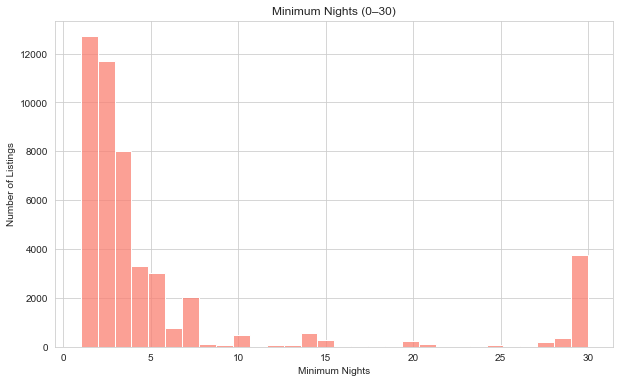

In [41]:
# Replot distribution and zoom in for more common range
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df[airbnb_df['minimum_nights'] <= 30]['minimum_nights'], bins=30, color='salmon')
plt.title('Minimum Nights (0–30)')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Listings')
plt.show()

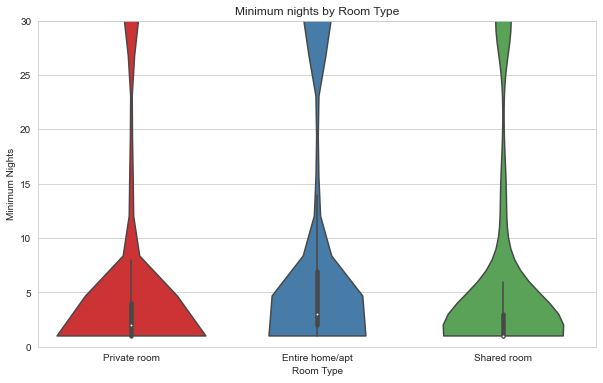

In [42]:
# Compare minimum nights by room type (Violin Plot)
plt.figure(figsize=(10,6))
sns.violinplot(data=airbnb_df_clean,
           x='room_type',
           y='minimum_nights',
           palette='Set1',
            cut = 0)
plt.title('Minimum nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.ylim(0, 30)
plt.show()

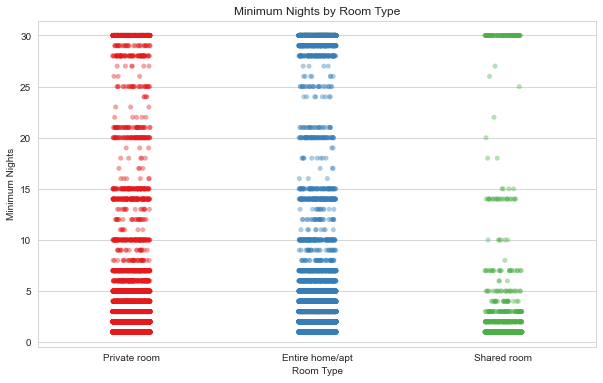

In [43]:
# Compare minimum nights by Room Type (Strip Plot)
plt.figure(figsize=(10,6))
sns.stripplot(data=airbnb_df_clean[airbnb_df_clean['minimum_nights'] <= 30],
             x='room_type',
             y='minimum_nights',
             jitter=True,
             palette='Set1',
             alpha=0.4)
plt.title('Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.show()

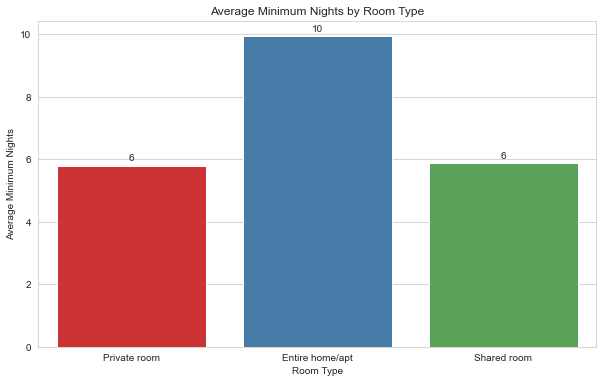

In [44]:
# Compare Average Minimum Nights by Room Type (Bar Plot with Aggregated Stats)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
           x='room_type',
           y='minimum_nights',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

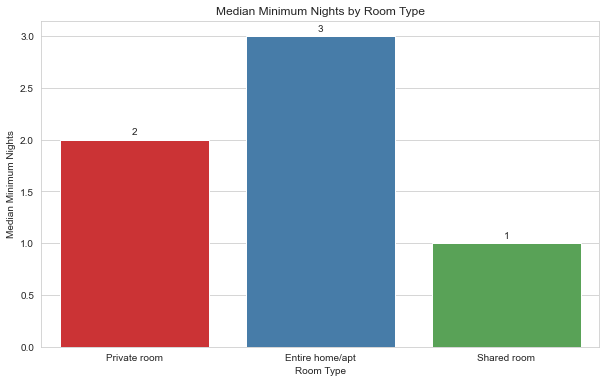

In [45]:
# Compare Median Minimum Nights by Room Type (Bar Plot with Aggregated Stats)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
           x='room_type',
           y='minimum_nights',
           estimator=np.median,
           ci=None,
           palette='Set1')
plt.title('Median Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Minimum Nights')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

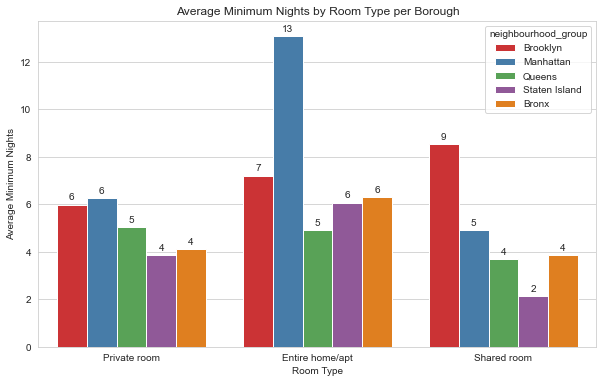

In [46]:
# Compare Average Minimum Nights by Room Type per Borough (Bar Plot with Aggregated Stats)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
           x='room_type',
           y='minimum_nights',
           estimator=np.mean,
           ci=None,
           palette='Set1',
                hue='neighbourhood_group')
plt.title('Average Minimum Nights by Room Type per Borough')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

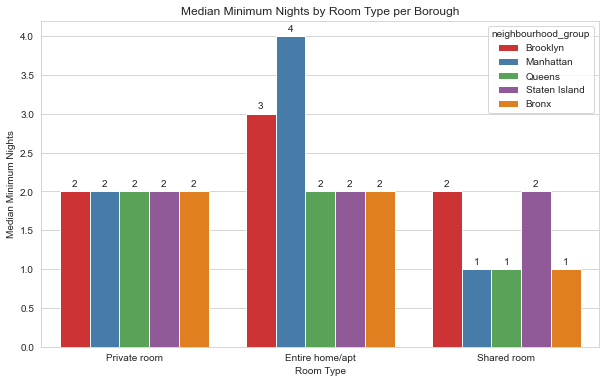

In [47]:
# Compare Median Minimum Nights by Room Type per Borough (Bar Plot with Aggregated Stats)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=airbnb_df_clean,
           x='room_type',
           y='minimum_nights',
           estimator=np.median,
           ci=None,
           palette='Set1',
                hue='neighbourhood_group')
plt.title('Median Minimum Nights by Room Type per Borough')
plt.xlabel('Room Type')
plt.ylabel('Median Minimum Nights')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

Now lets explore how available listings are using the 'availability_365' column

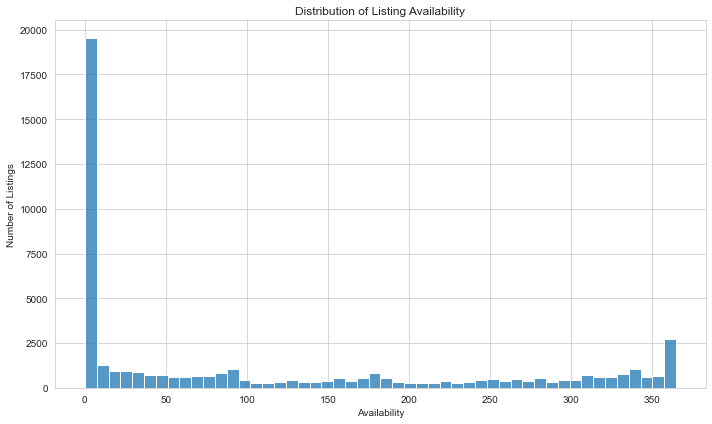

In [48]:
# Plot the raw distribution of 'availability_365'
plt.figure(figsize=(10,6))
sns.histplot(airbnb_df['availability_365'],
            bins=50,
            kde=False)
plt.title('Distribution of Listing Availability')
plt.xlabel('Availability')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

Wow! A lot of places are not available very often throughout the year!

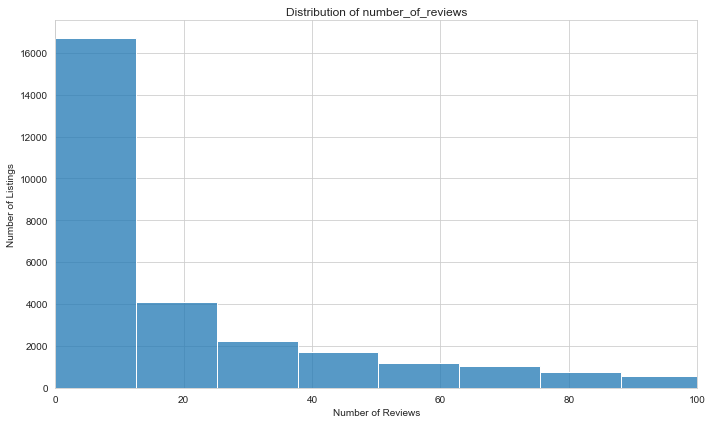

In [49]:
# Plot the distribution of number of reviews
plt.figure(figsize=(10,6))
sns.histplot(airbnb_df_clean['number_of_reviews'],
            bins=50,
            kde=False)
plt.title('Distribution of number_of_reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.xlim(0,100) # Cap to avoid outliers skewing the view
plt.tight_layout()
plt.show()

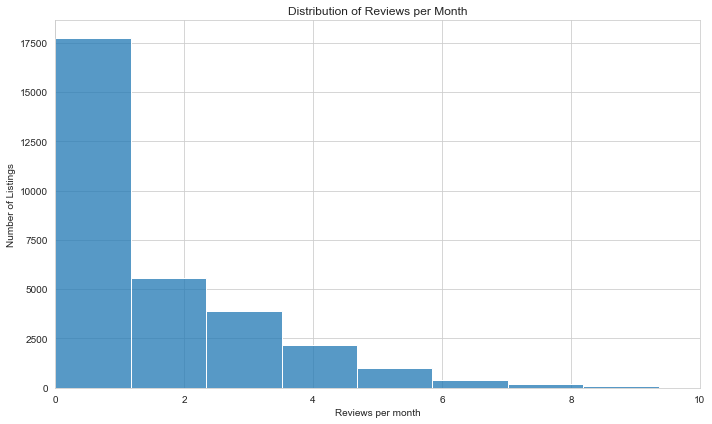

In [50]:
# Plot the distribution of reviews per month
plt.figure(figsize=(10,6))
sns.histplot(airbnb_df_clean['reviews_per_month'],
            bins=50,
            kde=False)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per month')
plt.ylabel('Number of Listings')
plt.xlim(0,10) # Cap to 10 because most places don't receive that many reviews per month
plt.tight_layout()
plt.show()

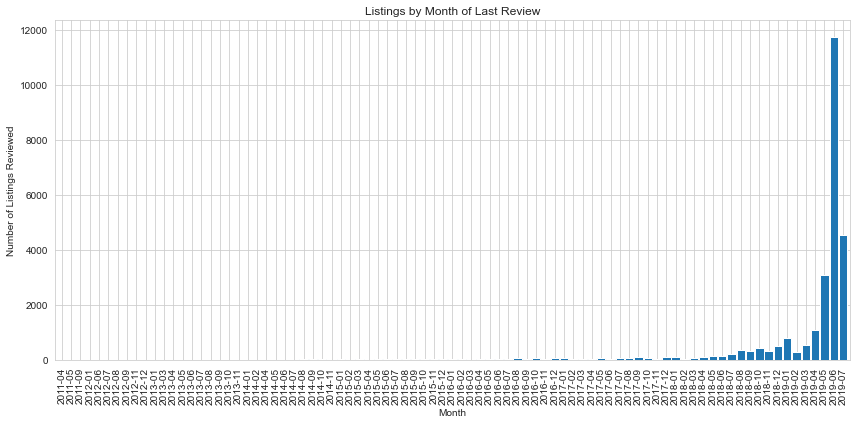

In [51]:
# Plot the distribution of Last Review Date
plt.figure(figsize=(12, 6))
airbnb_df_clean['last_review'].dropna().dt.to_period('M').value_counts().sort_index().plot(kind='bar', width=0.9)
plt.title('Listings by Month of Last Review')
plt.xlabel('Month')
plt.ylabel('Number of Listings Reviewed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It appears most places have been reviewed recently but this plot is very hard to read, lets clean it up

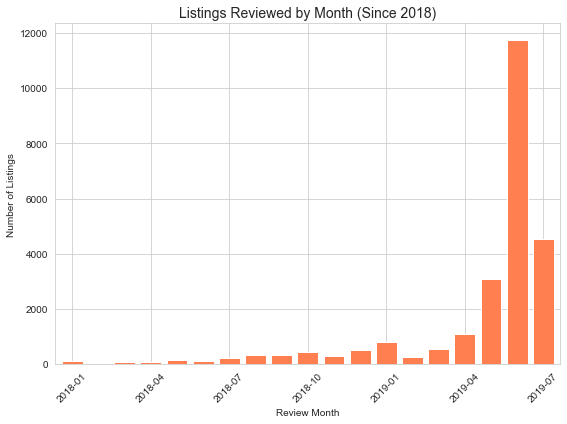

In [52]:
# Drop NaT and group by year-month
monthly_reviews = airbnb_df_clean['last_review'].dropna().dt.to_period('M').value_counts().sort_index()

# Focus only on more recent reviews
recent_reviews = monthly_reviews[monthly_reviews.index >= '2018-01']

# Plot distribuition of recent reviews
plt.figure(figsize=(8, 6))
recent_reviews.plot(kind='bar', color='coral', width=0.8)

plt.title('Listings Reviewed by Month (Since 2018)', fontsize=14)
plt.xlabel('Review Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

# Reduce number of x-ticks shown for clarity
plt.xticks(ticks=range(0, len(recent_reviews), 3), labels=[str(p) for i, p in enumerate(recent_reviews.index) if i % 3 == 0])

plt.tight_layout()
plt.show()


Which room types and boroughs get the most reviews?

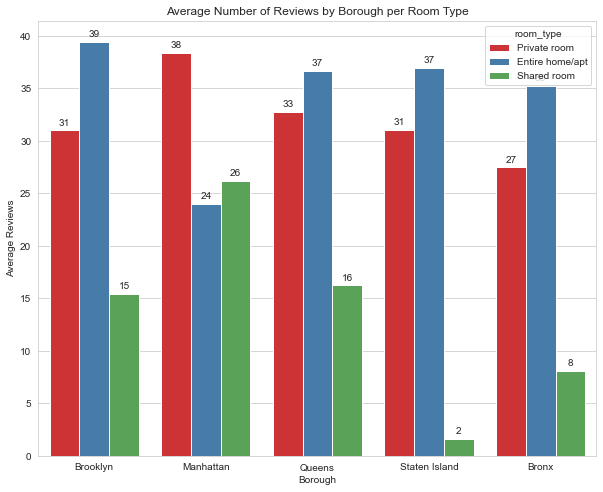

In [53]:
# Plot the distribution for the average number of reviews by borough per room type
plt.figure(figsize=(10,8))
ax = sns.barplot(data=airbnb_df_clean,
           x='neighbourhood_group',
           y='number_of_reviews',
           hue='room_type',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average Number of Reviews by Borough per Room Type')
plt.xlabel('Borough')
plt.ylabel('Average Reviews')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

After reviewing this, entire homes on average get more reviews, followed by private rooms, then shared rooms With Queens having the most reviews. Poor staten island.

Lets now explore how availability by borough, room type and price.

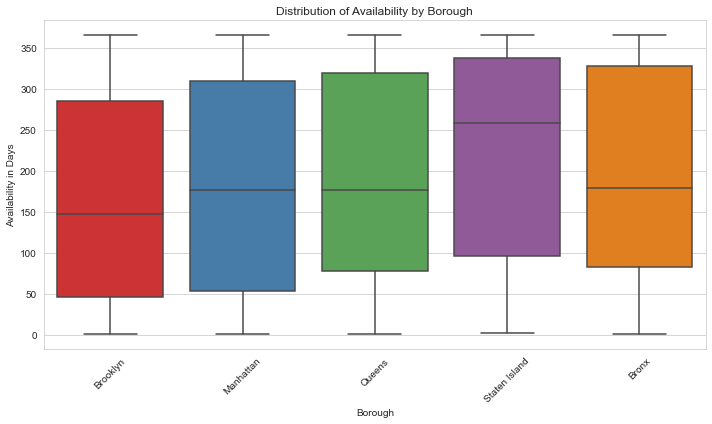

In [54]:
# Plot the distribution of availability by bourough
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=airbnb_df_clean,
           x='neighbourhood_group',
           y='availability_365',
           palette='Set1')
plt.title('Distribution of Availability by Borough')
plt.xlabel('Borough')
plt.ylabel('Availability in Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

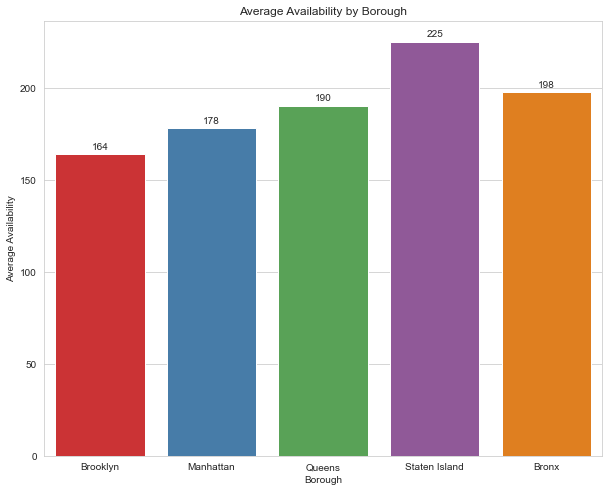

In [55]:
# Plot the average availability of each borough
plt.figure(figsize=(10,8))
ax = sns.barplot(data=airbnb_df_clean,
           x='neighbourhood_group',
           y='availability_365',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average Availability by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Availability')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

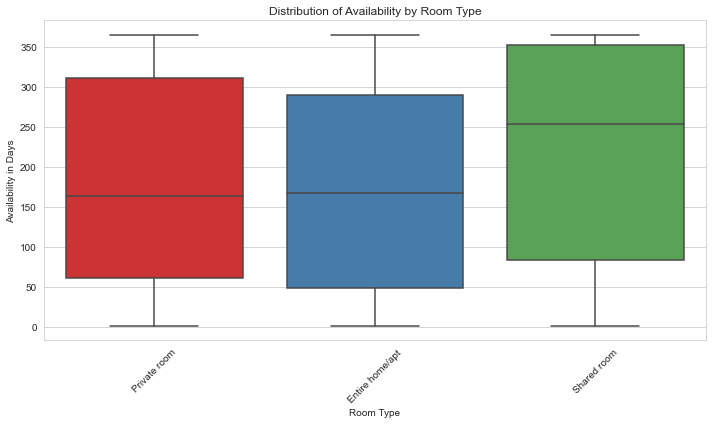

In [56]:
# Plot the distribution of availability per room type\
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=airbnb_df_clean,
           x='room_type',
           y='availability_365',
           palette='Set1')
plt.title('Distribution of Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability in Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

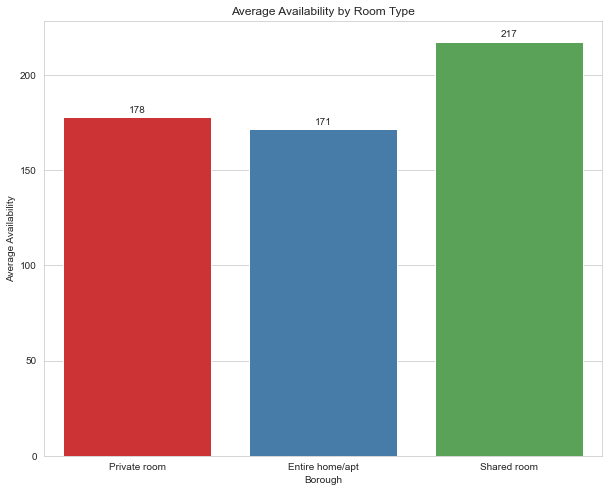

In [57]:
# Plot the average availability of each room type
plt.figure(figsize=(10,8))
ax = sns.barplot(data=airbnb_df_clean,
           x='room_type',
           y='availability_365',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average Availability by Room Type')
plt.xlabel('Borough')
plt.ylabel('Average Availability')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

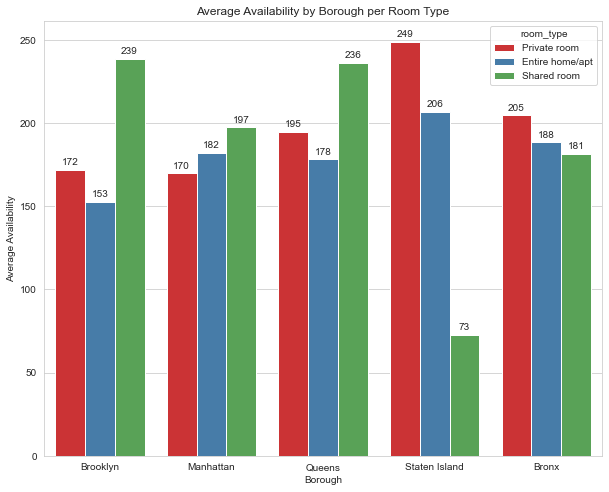

In [58]:
# Plot the average availability of each room type in each borough
plt.figure(figsize=(10,8))
ax = sns.barplot(data=airbnb_df_clean,
           x='neighbourhood_group',
           y='availability_365',
           hue='room_type',
           estimator=np.mean,
           ci=None,
           palette='Set1')
plt.title('Average Availability by Borough per Room Type')
plt.xlabel('Borough')
plt.ylabel('Average Availability')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

In this plot we can see what kinds of rooms are typically available in each borough, now we can compare pricing to see what rooms are typically available and how much they are.

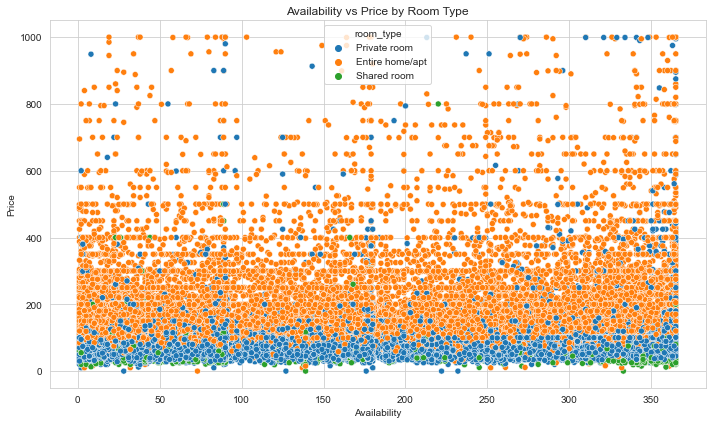

In [59]:
# Plot the availability of rooms compared to the price of each room type
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb_df_clean[airbnb_df_clean['price'] <= 1000],
               x='availability_365',
               y='price',
               hue='room_type')
plt.title('Availability vs Price by Room Type')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

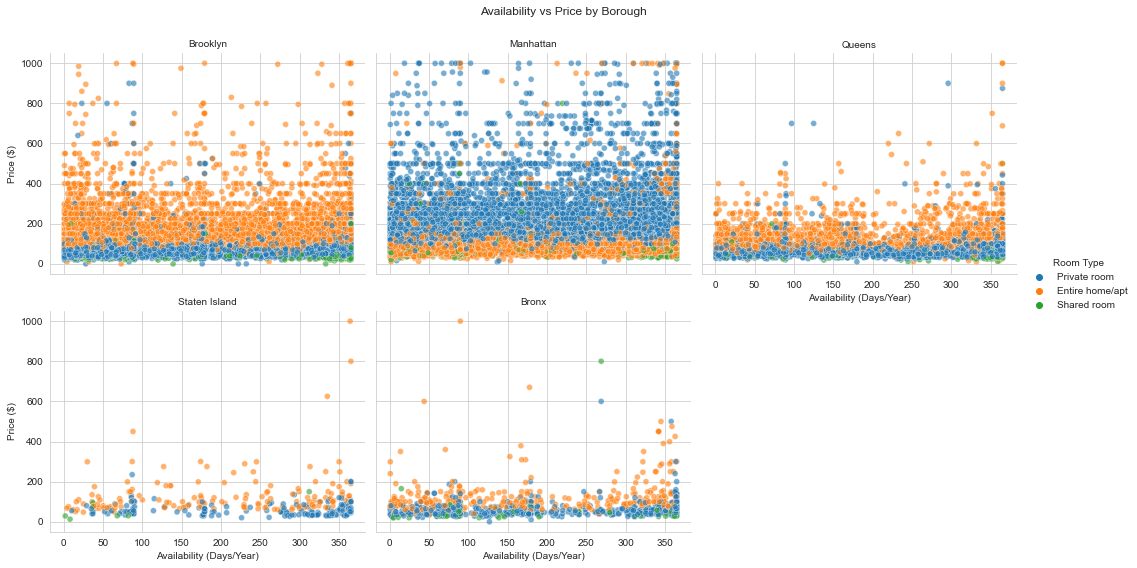

In [60]:
# Plot the availability vs price for each borough and room type
# Create the FacetGrid
fg = sns.FacetGrid(airbnb_df_clean[airbnb_df_clean['price'] <= 1000],
                  col="neighbourhood_group", 
                  col_wrap=3, 
                  height=4, 
                  aspect=1.2)
fg.map_dataframe(sns.scatterplot, 
                x="availability_365", 
                y="price", 
                hue="room_type", 
                alpha=0.6)

# Adjust aesthetics
fg.set_titles(col_template="{col_name}")
fg.set_axis_labels("Availability (Days/Year)", "Price ($)")
fg.add_legend(title="Room Type")
plt.subplots_adjust(top=0.9)
fg.fig.suptitle("Availability vs Price by Borough")
plt.show()

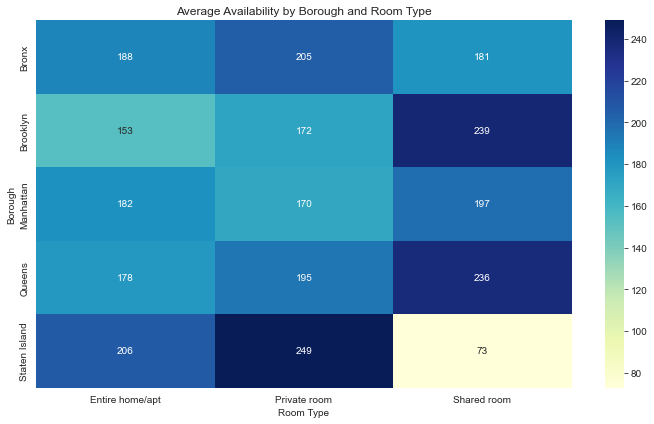

In [61]:
# Create heatmap to show avg availability per borough and room type
availability_pivot = airbnb_df_clean.pivot_table(
    values='availability_365',
    index='neighbourhood_group',
    columns='room_type',
    aggfunc=np.mean
)

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(availability_pivot,
           annot=True,
           fmt='.0f',
           cmap='YlGnBu')
plt.title('Average Availability by Borough and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Borough')
plt.tight_layout()
plt.show()

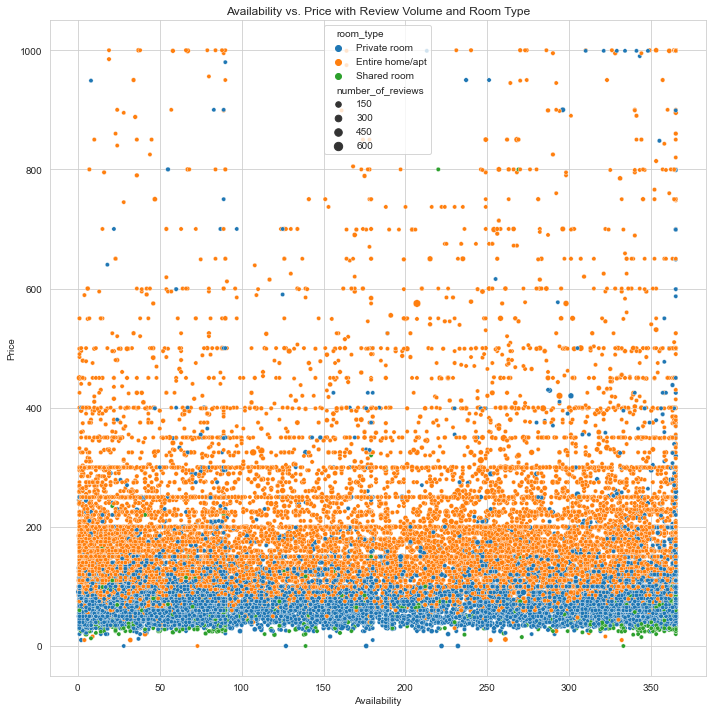

In [62]:
# Filter df for plot
filter_df = airbnb_df_clean[(airbnb_df_clean['number_of_reviews'] > 0)]

# Create plot to show availability vs price with reviews and room type
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=filter_df,
    x='availability_365',
    y='price',
    size='number_of_reviews',
    hue='room_type')

plt.title('Availability vs. Price with Review Volume and Room Type')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Now that we have done an exploration of the data, lets begin running machine learning algorithms

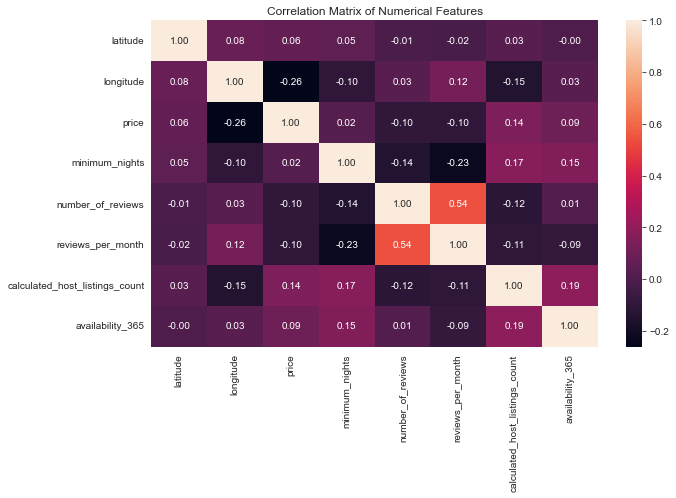

In [63]:
# Make a correlation matrix and plot it

# First create dataframe with only the numeric columns
numeric_df = airbnb_df_clean.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,
           annot=True,
           fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

It appears that price isnt very correlated with these variables, after our investigation into the data, the main correlation between price is the room type and the borough its in

<Figure size 864x864 with 0 Axes>

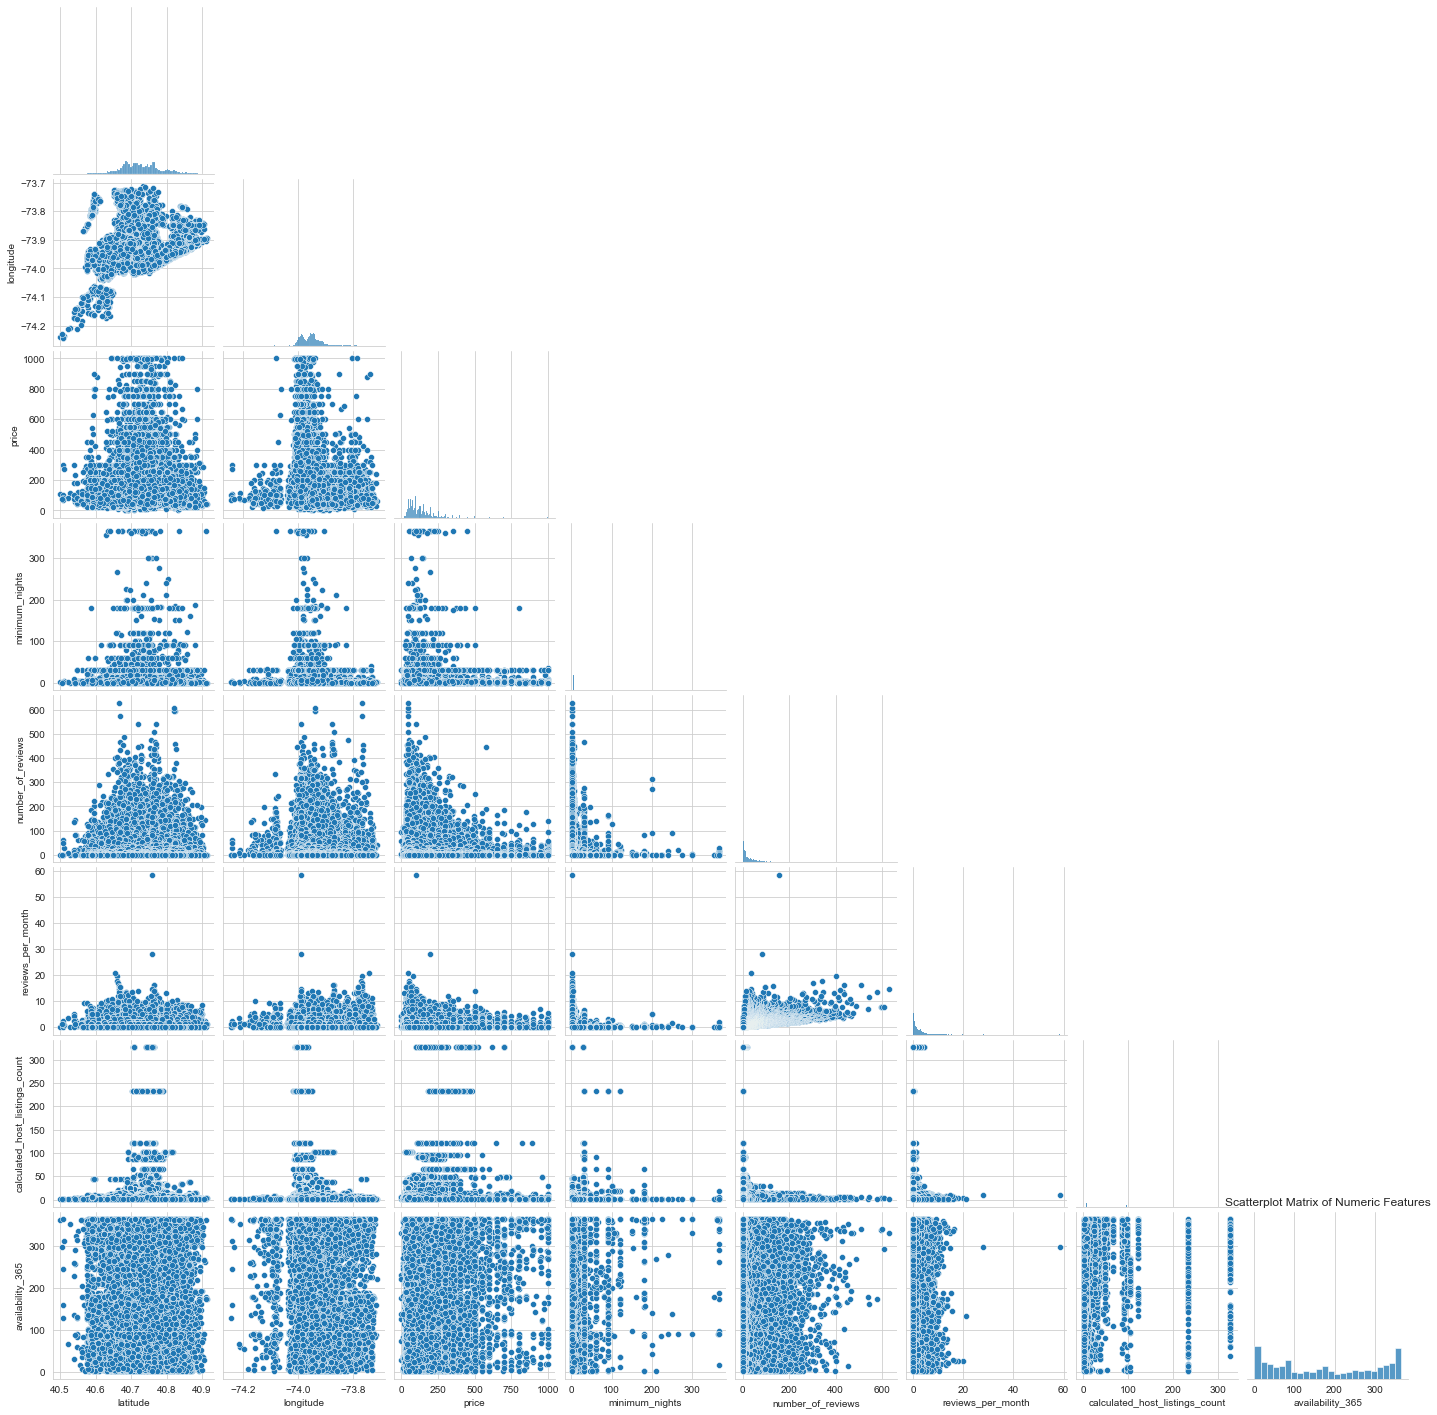

In [64]:
# Plot a scatterplot
plt.figure(figsize=(12,12))
sns.pairplot(numeric_df, corner=True)
plt.title('Scatterplot Matrix of Numeric Features')
plt.show()

After a thorough EDA I am now ready to begin building a reproducible pipeline for my data and begin model development

In [65]:
print(airbnb_df_clean.shape)
print(airbnb_df_clean.dtypes)

(31173, 15)
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [67]:
# Create features
features = ['room_type', 'neighbourhood_group', 'minimum_nights',
           'number_of_reviews', 'reviews_per_month', 'availability_365']
# Create target
target = 'price'
# Create X df and y df
X = airbnb_df_clean[features]
y = airbnb_df_clean[target]

In [68]:
# Split dataset into Train and Testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the column types
categorical_columns = ['room_type', 'neighbourhood_group']
numeric_columns = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Define the transformations for the column transformer
preprocess = ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

In [72]:
# Create the full pipeline with Regressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linregress_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

In [73]:
# Fit the model to the data
linregress_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'availability_365']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['room_type',
                                                   'neighbourhood_group'])])),
                ('regressor', LinearRegression())])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test set
y_pred = linregress_pipeline.predict(X_test)

# Evaluate the predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Scores 
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 62.68
Mean Squared Error: 10452.64
Root Mean Squared Error: 102.24
R2 Score: 0.31


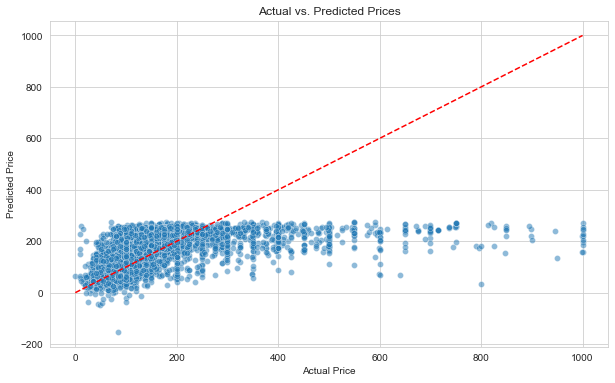

In [77]:
# Plot the Actual vs. Predicted in a Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, 
               y=y_pred,
               alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
        'r--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

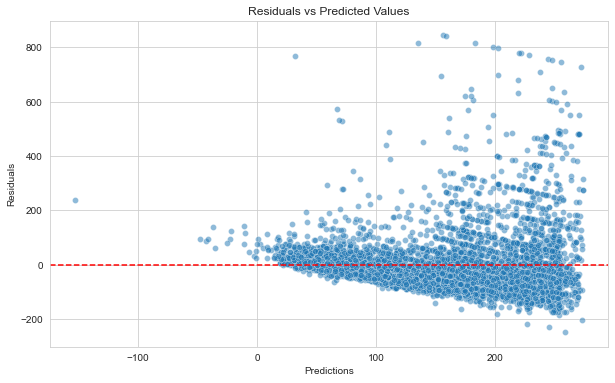

In [78]:
# Plot the residuals
residuals = y_test-y_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

After viewing the scores and plotting results it is clear that the data is not linear and the linear regression model struggled with this. Time to try a decision tree regressor.

In [86]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Define the transformations for the column transformer for the tree
tree_preprocess = ColumnTransformer(
    transformers= [
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Create decision tree pipeline
tree_pipeline = Pipeline(steps=[
    ('tree_preprocess', tree_preprocess),
    ('tree', DecisionTreeRegressor(max_depth=5, random_state=42))
])

In [87]:
# Fit the data to the training set
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tree_preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'availability_365']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['room_type',
                                                   'neighbourhood_group'])])),
                ('tree', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [88]:
# Make predictions on test set
y_pred_tree = tree_pipeline.predict(X_test)

# Evaluate the predictions
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print Scores 
print(f"Mean Absolute Error: {mae_tree:.2f}")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"Root Mean Squared Error: {rmse_tree:.2f}")
print(f"R2 Score: {r2_tree:.2f}")

Mean Absolute Error: 59.82
Mean Squared Error: 10183.99
Root Mean Squared Error: 100.92
R2 Score: 0.33


Scores are not great, lets use gridsearchcv to tune the hyperparameters and see if the scores can improve

In [93]:
# import grid search
from sklearn.model_selection import GridSearchCV

# Create hyper parameters grid that I want to be optimized
param_tree = {
    'tree__max_depth': [5, 7, 10, 12, 15],
    'tree__min_samples_split': [2, 5, 7, 10, 12],
    'tree__min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create Grid Search
grid_search_tree = GridSearchCV(
    tree_pipeline,
    param_tree,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=2
)

# Fit the grid search to the data
grid_search_tree.fit(X_train, y_train)

# Print the best parameters
print('Best parameters found:')
print(grid_search_tree.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.0s
[CV] END tree__max_depth=5, tree__min

[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=5; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=5, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0

[CV] END tree__max_depth=7, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.0s
[CV] END tree__max_depth=7, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   

[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.0s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=1, tree__min_samples_split=7; total tim

[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.0s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.0s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=12; total time=   0.1s
[CV] END tree__max_depth=10, tree__min_samples_leaf=4, tree__min_samples_split=12; to

[CV] END tree__max_depth=12, tree__min_samples_leaf=2, tree__min_samples_split=10; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=2, tree__min_samples_split=12; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=3, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=12, tree__min_samples_leaf=3, tree__min_samples_split=2; tot

[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=2; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=1, tree__min_samples_split=7; total tim

[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=5; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=7; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=10; total time=   0.1s
[CV] END tree__max_depth=15, tree__min_samples_leaf=4, tree__min_samples_split=10; total

In [95]:
# Use the best parameters for the tree 
best_tree = grid_search_tree.best_estimator_

# Make predictions with tree
y_pred_tree = best_tree.predict(X_test)

# Evaluate the predictions
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print Scores 
print(f"Mean Absolute Error: {mae_tree:.2f}")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"Root Mean Squared Error: {rmse_tree:.2f}")
print(f"R2 Score: {r2_tree:.2f}")

Mean Absolute Error: 59.03
Mean Squared Error: 10033.32
Root Mean Squared Error: 100.17
R2 Score: 0.34


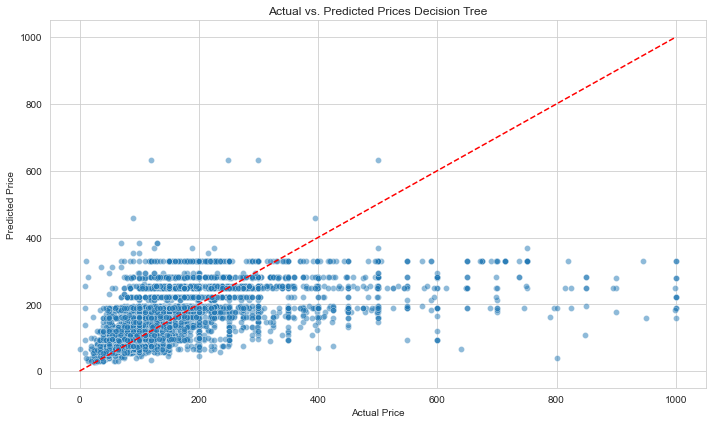

In [97]:
# Plot the Actual vs. Predicted in a Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, 
               y=y_pred_tree,
               alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
        'r--')
plt.title('Actual vs. Predicted Prices Decision Tree')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

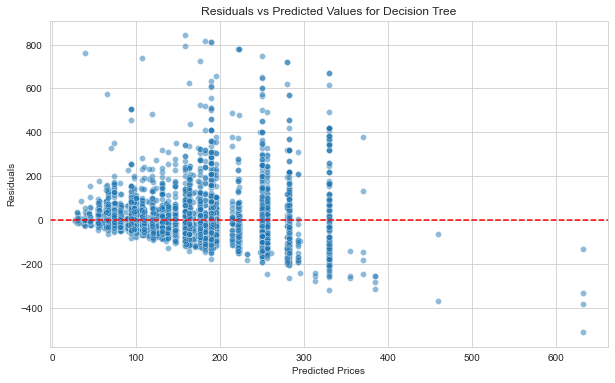

In [98]:
# Plot the residuals
residuals = y_test-y_pred_tree

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_tree, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for Decision Tree')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

After running the decision tree I can tell that it scores better than the linear regression model but still does not have the best results, lets try knn now

In [106]:
# import knn
from sklearn.neighbors import KNeighborsRegressor

# Pipeline
knn_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('knn', KNeighborsRegressor())
])

# Parameter grid
param_knn = {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__weights': ['uniform', 'distance']
}

# Perform grid search
grid_search_knn = GridSearchCV(knn_pipeline,
                              param_knn,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=1,
                              verbose=2)

# Fit the grid search with the training data
grid_search_knn.fit(X_train, y_train)

# Use the best parameters for the tree 
best_knn = grid_search_tree.best_estimator_

# Make Predictions with best knn
y_pred_knn = best_knn.predict(X_test)

# Evaluate the predictions
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print Scores 
print(f"Mean Absolute Error: {mae_knn:.2f}")
print(f"Mean Squared Error: {mse_knn:.2f}")
print(f"Root Mean Squared Error: {rmse_knn:.2f}")
print(f"R2 Score: {r2_knn:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.2s
[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.2s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.1s
[CV] END ...........knn__n_neighbors=5, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=5, knn__wei

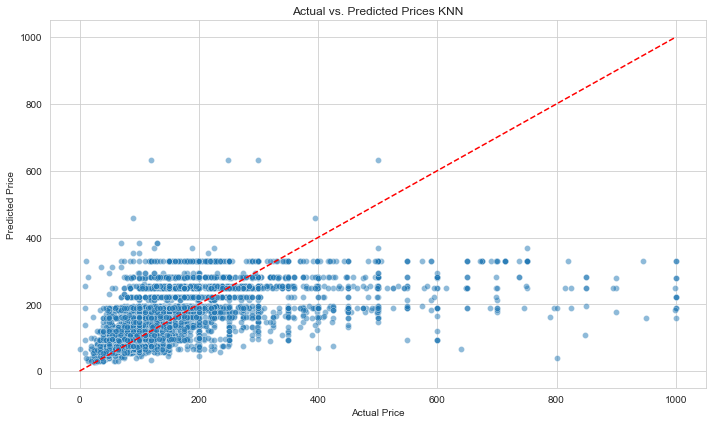

In [104]:
# Plot the Actual vs. Predicted in a Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, 
               y=y_pred_knn,
               alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
        'r--')
plt.title('Actual vs. Predicted Prices KNN')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

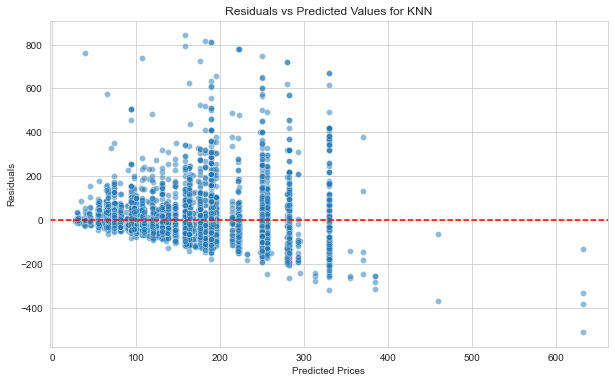

In [105]:
# Plot the residuals
residuals = y_test-y_pred_knn

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_knn, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for KNN')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

Knn did not do as well as I thought it would, lets try a random forest and see if it does better.

In [108]:
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Create the pipeline
rf_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('rf', RandomForestRegressor(random_state=42))
])

# Create parameter grid
param_rf = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [10, 15, 20],
    'rf__min_samples_split': [2, 3, 5]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(rf_pipeline,
                             param_rf,
                             cv=5,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,
                             verbose=2)

# Fit the grid search with the training data
grid_search_rf.fit(X_train, y_train)

# Use the best parameters for the tree 
best_rf = grid_search_rf.best_estimator_

# Make Predictions with best knn
y_pred_rf = best_rf.predict(X_test)

# Evaluate the predictions
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Scores 
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Absolute Error: 57.39
Mean Squared Error: 9386.34
Root Mean Squared Error: 96.88
R2 Score: 0.38
MAPE: inf%
[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100; total time=   3.5s
[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=150; total time=   6.0s
[CV] END rf__max_depth=10, rf__min_samples_split=3, rf__n_estimators=100; total time=   4.0s
[CV] END rf__max_depth=10, rf__min_samples_split=3, rf__n_estimators=150; total time=   5.8s
[CV] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=100; total time=   3.9s
[CV] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=150; total time=   6.1s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=100; total time=   5.8s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=150; total time=   8.8s
[CV] END rf__max_depth=15, rf__min_samples_split=3, rf__n_estimators=100; total ti

[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100; total time=   3.5s
[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=200; total time=   7.9s
[CV] END rf__max_depth=10, rf__min_samples_split=3, rf__n_estimators=100; total time=   3.9s
[CV] END rf__max_depth=10, rf__min_samples_split=3, rf__n_estimators=200; total time=   7.8s
[CV] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=150; total time=   6.1s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=100; total time=   5.8s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=150; total time=   8.8s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=200; total time=  11.6s
[CV] END rf__max_depth=15, rf__min_samples_split=3, rf__n_estimators=200; total time=  11.6s
[CV] END rf__max_depth=15, rf__min_samples_split=5, rf__n_estimators=150; total time=   8.9s
[CV] END rf__max_depth=15, rf__min_samples_split=5, rf__n_estimators=2

[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100; total time=   3.5s
[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=200; total time=   7.9s
[CV] END rf__max_depth=10, rf__min_samples_split=3, rf__n_estimators=150; total time=   5.8s
[CV] END rf__max_depth=10, rf__min_samples_split=3, rf__n_estimators=200; total time=   7.9s
[CV] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=200; total time=   8.0s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=100; total time=   5.8s
[CV] END rf__max_depth=15, rf__min_samples_split=2, rf__n_estimators=200; total time=  11.5s
[CV] END rf__max_depth=15, rf__min_samples_split=3, rf__n_estimators=150; total time=   8.8s
[CV] END rf__max_depth=15, rf__min_samples_split=3, rf__n_estimators=200; total time=  11.8s
[CV] END rf__max_depth=15, rf__min_samples_split=5, rf__n_estimators=150; total time=   8.8s
[CV] END rf__max_depth=20, rf__min_samples_split=2, rf__n_estimators=1

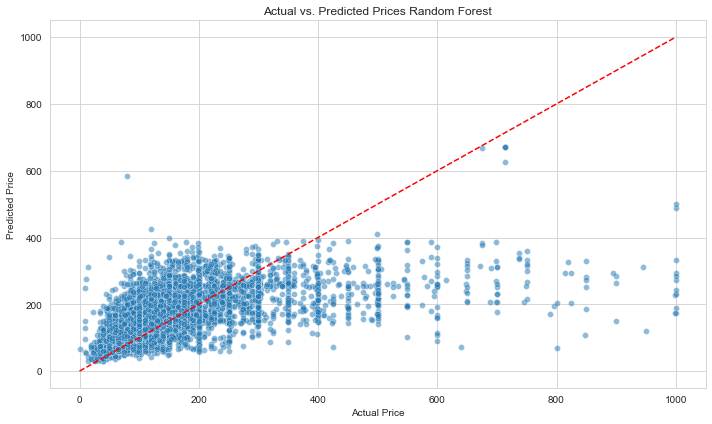

In [109]:
# Plot the Actual vs. Predicted in a Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, 
               y=y_pred_rf,
               alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
        'r--')
plt.title('Actual vs. Predicted Prices Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

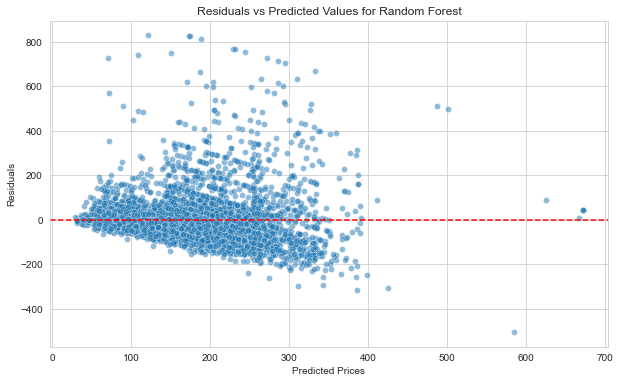

In [110]:
# Plot the residuals
residuals = y_test-y_pred_rf

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for Random Forest')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

I believe random forest did a bit better, lets try another model with Gradient Boosting to see if it can perform a bit better

In [111]:
# import Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

# Create the pipeline
gb_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('gb', GradientBoostingRegressor(random_state=42))
])

# Create parameter grid
param_gb = {
    'gb__n_estimators': [100, 150, 200],
    'gb__max_depth': [3, 5, 7],
    'gb__learning_rate': [0.05, 0.1, 0.15]
}

# Perform Grid Search
grid_search_gb = GridSearchCV(gb_pipeline,
                             param_gb,
                             cv=5,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,
                             verbose=2)

# Fit the grid search with the training data
grid_search_gb.fit(X_train, y_train)

# Use the best parameters for the tree 
best_gb = grid_search_gb.best_estimator_

# Make Predictions with best knn
y_pred_gb = best_gb.predict(X_test)

# Evaluate the predictions
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print Scores 
print(f"Mean Absolute Error: {mae_gb:.2f}")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"Root Mean Squared Error: {rmse_gb:.2f}")
print(f"R2 Score: {r2_gb:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/michealrawlings/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/michealrawlings/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/michealrawlings/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/michealrawlings/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy

Mean Absolute Error: 57.83
Mean Squared Error: 9503.99
Root Mean Squared Error: 97.49
R2 Score: 0.37


In [ ]:
# Plot the Actual vs. Predicted in a Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, 
               y=y_pred_gb,
               alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
        'r--')
plt.title('Actual vs. Predicted Prices Gradient Boosting')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

In [ ]:
# Plot the residuals
residuals = y_test-y_pred_gb

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_gb, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for Gradient Boos')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()